In [151]:

# Import all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
# Import the data - read the csv file and view the data.

df = pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [153]:
# let us drop the carid variable ass we don't need it for analysis
df.drop(labels = ['car_ID'], axis = 1, inplace = True)


In [154]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [156]:
# extract only the company name from car name

df['CompanyName'] = df['CarName'].str.split().str[0]
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [157]:
# drop carname column
df.drop(labels = ['CarName'], axis = 1, inplace = True)


In [158]:
# see all unique company names
df['CompanyName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [159]:
# as we observer that many have wrong spelling , so we correct it 


df['CompanyName'] = df['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
df['CompanyName'] = df['CompanyName'].replace(['Nissan'], 'nissan')
df['CompanyName'] = df['CompanyName'].replace(['porcshce'], 'porsche')
df['CompanyName'] = df['CompanyName'].replace(['toyouta'], 'toyota')
df['CompanyName'] = df['CompanyName'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [160]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


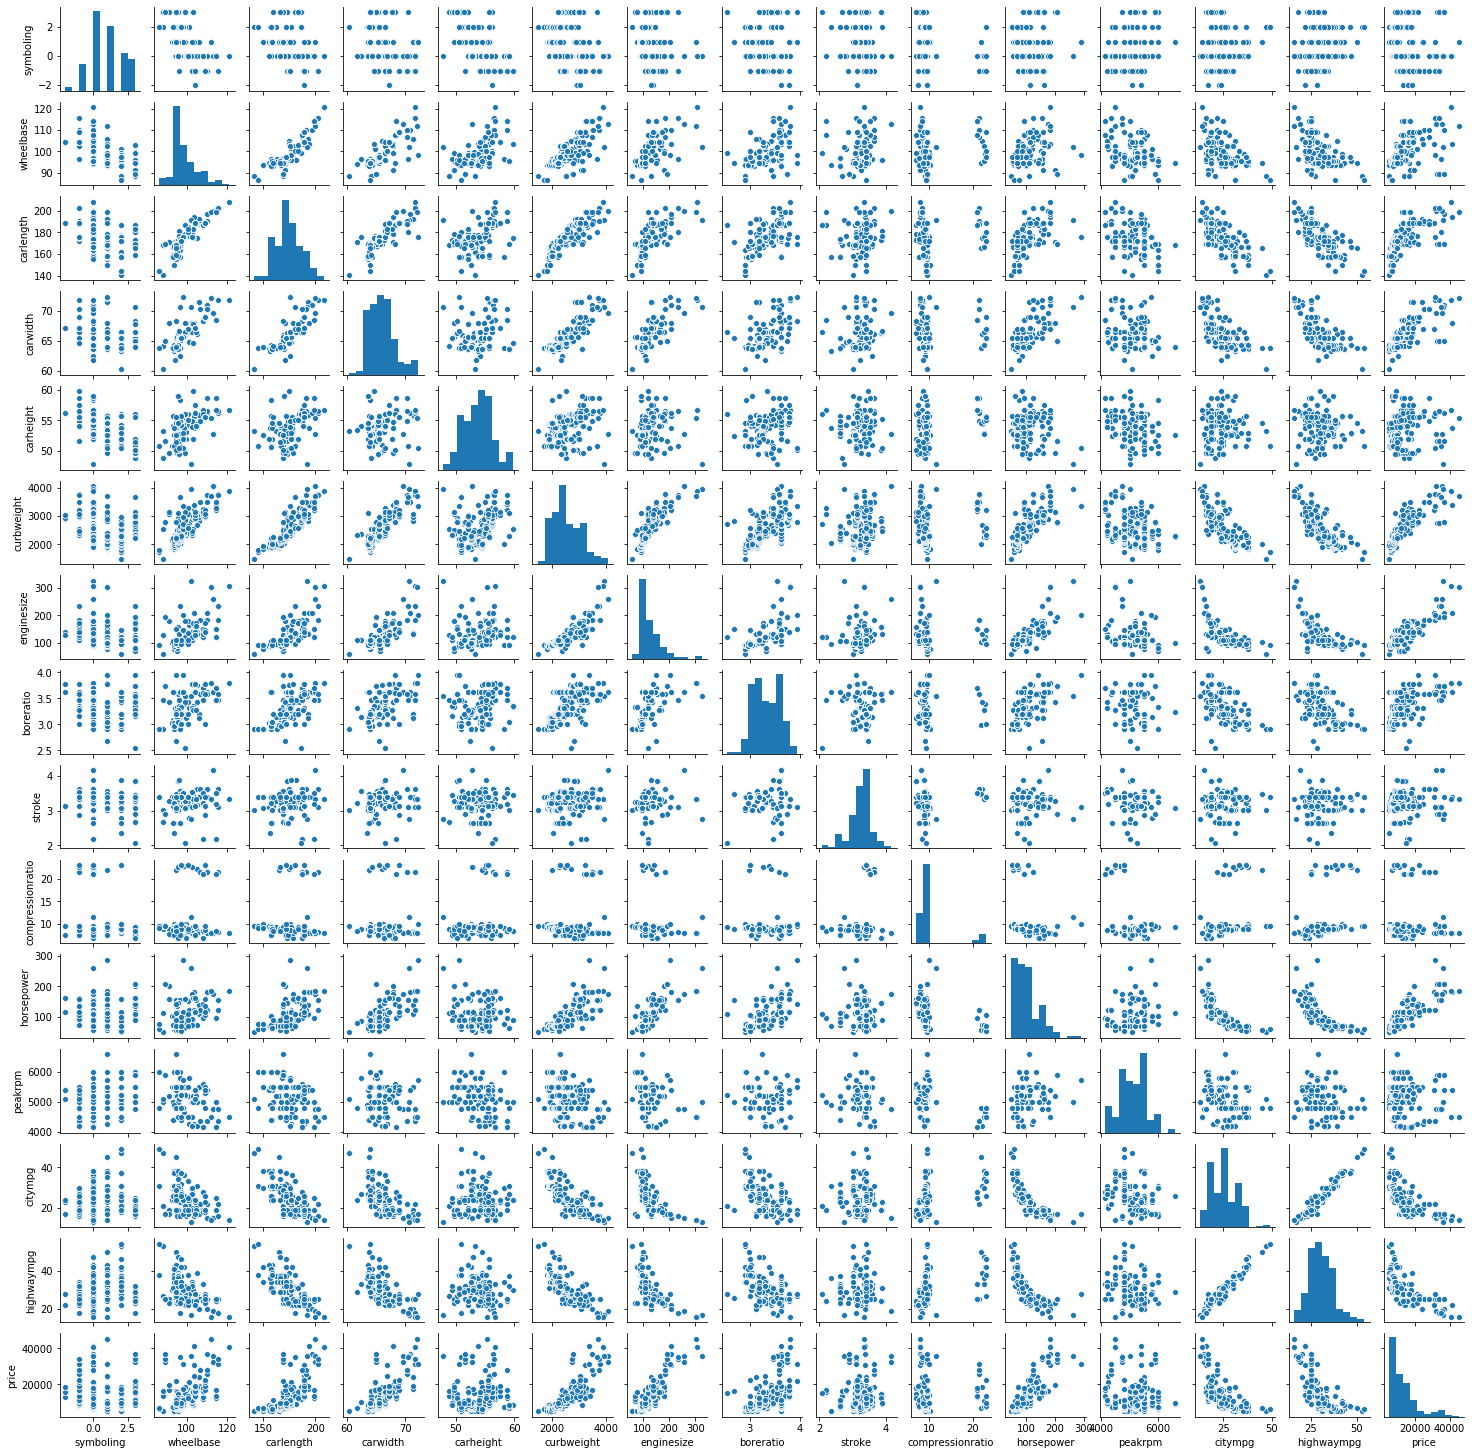

In [39]:
# paiplot for all variables
pairplot = sns.pairplot(df)
pairplot.fig.set_size_inches(20,20)
plt.show()

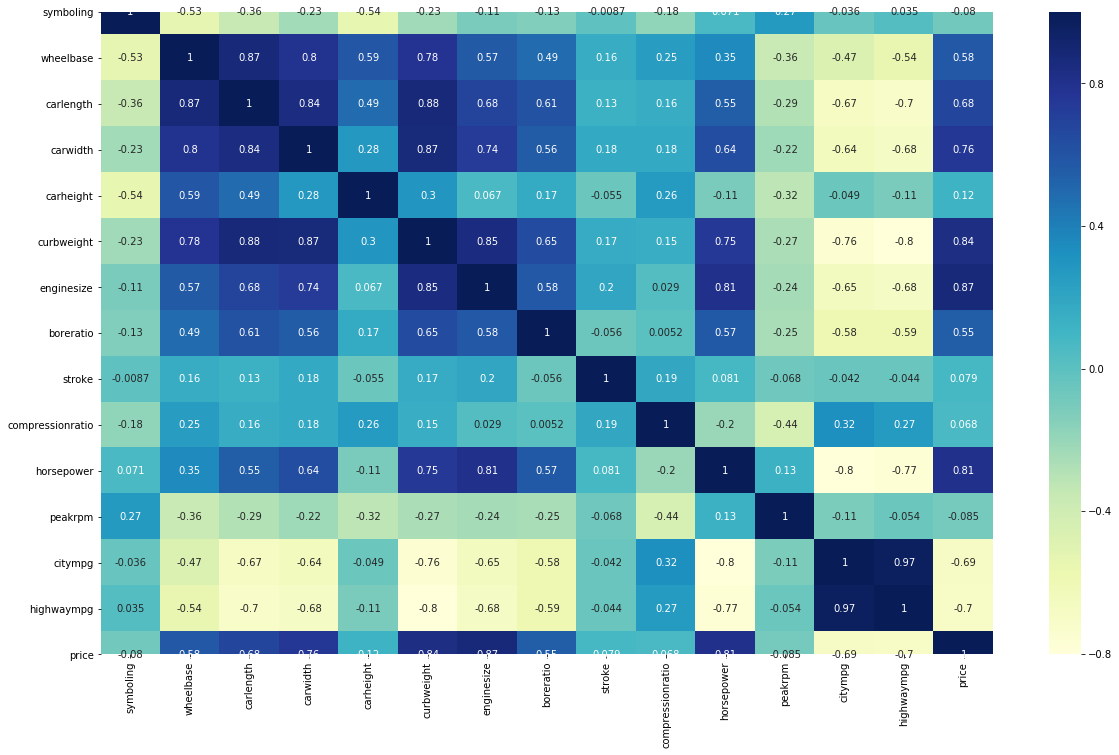

In [162]:
# let's see  the correlation 
plt.figure(figsize = (20, 26))
plt.subplot(2, 1, 1)
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

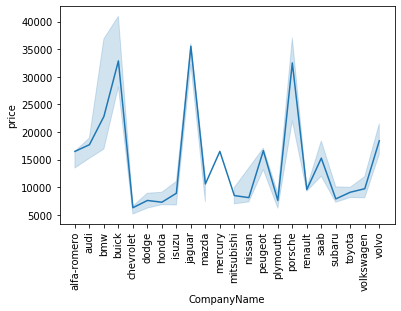

<Figure size 2160x864 with 0 Axes>

In [163]:
# let us look at the categorical data first
sns.lineplot(x='CompanyName', y='price', data=df, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(30, 12))
plt.show()

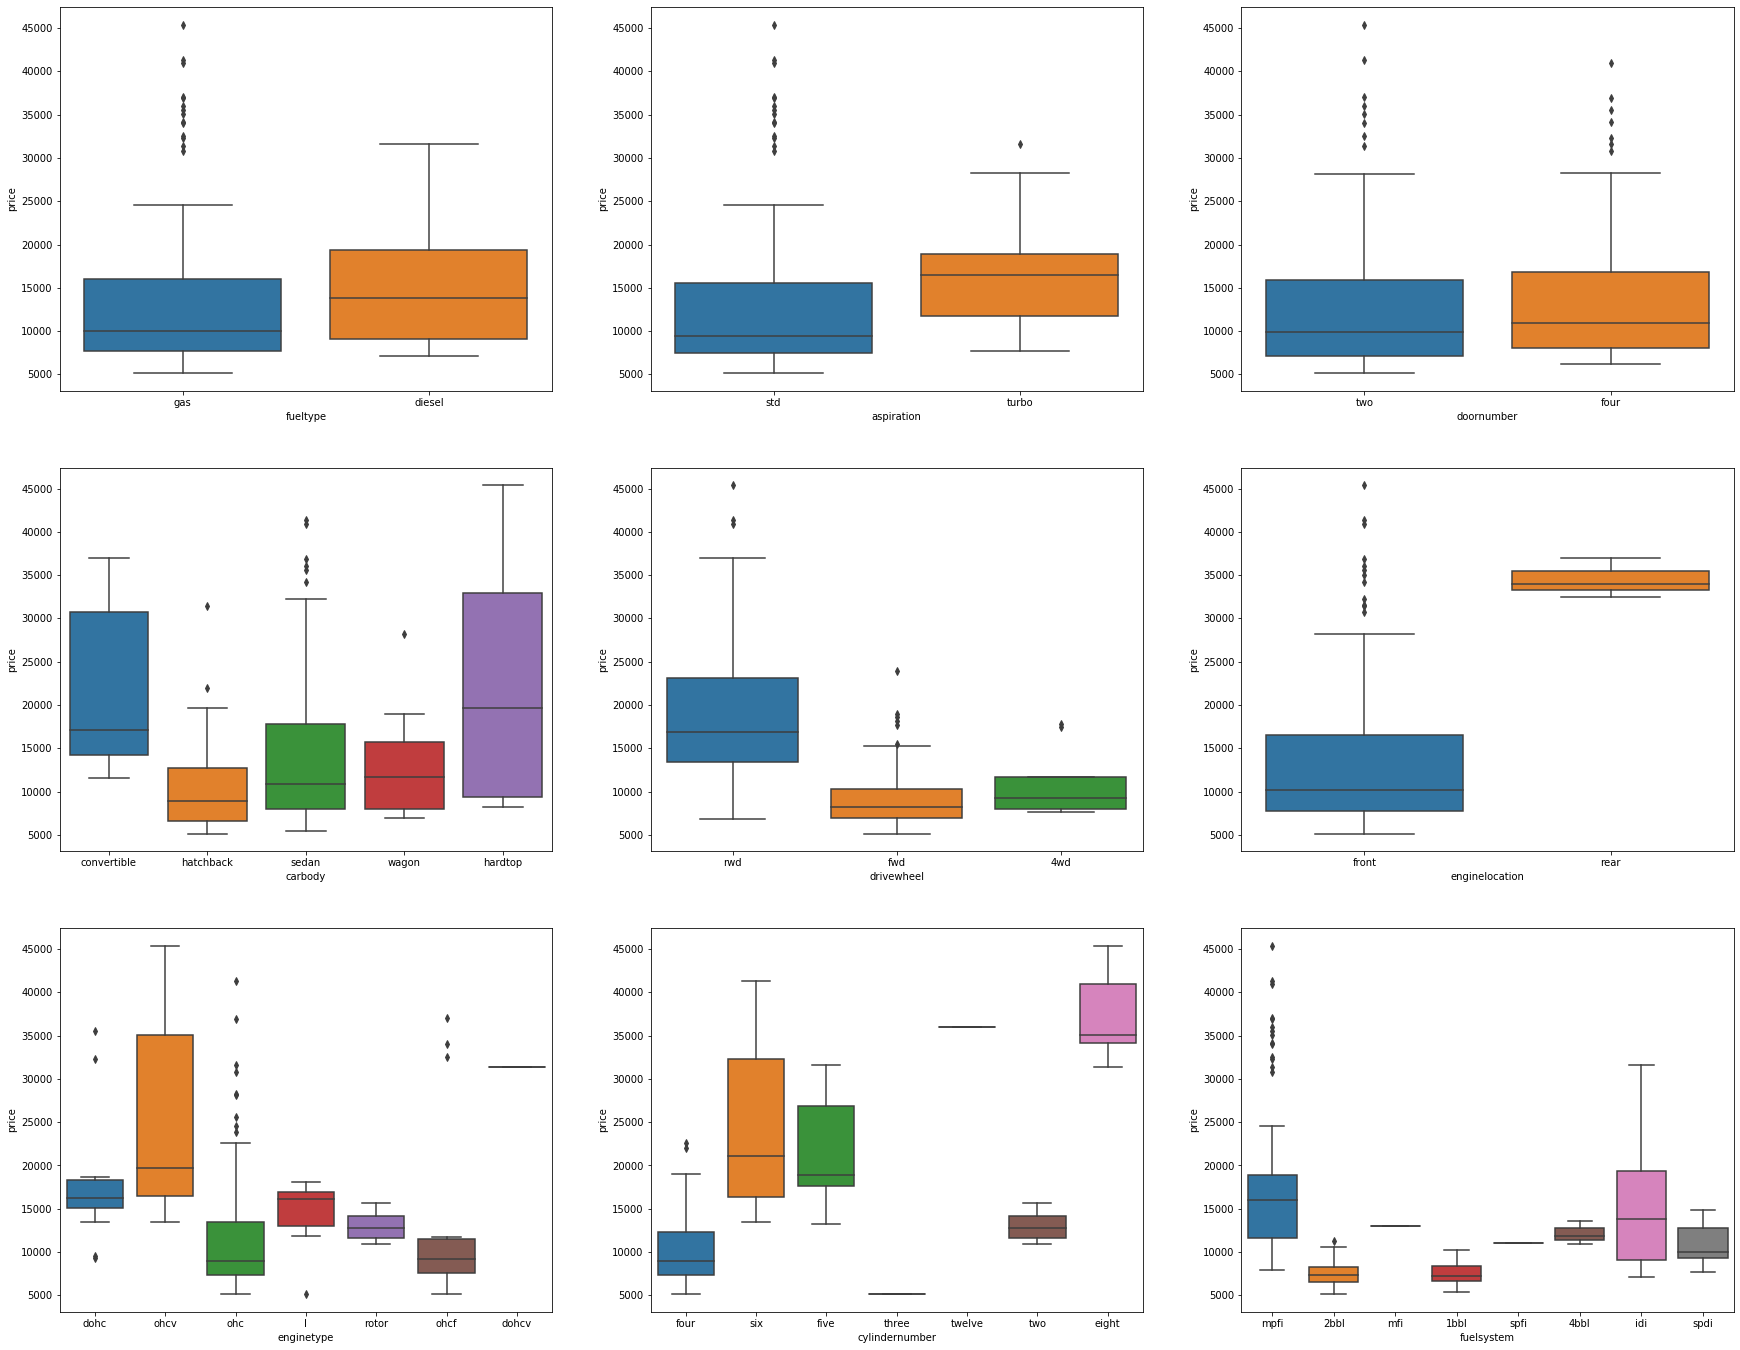

In [164]:
# let us see box plots for all variables
plt.figure(figsize=(30, 24))

plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y = 'price', data = df)

plt.subplot(3, 3, 2)
sns.boxplot(x='aspiration', y = 'price', data = df)

plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df)

plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)

plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)

plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)

plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)

plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)

plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)

plt.show()

In [165]:
# let us print all unique values for actegorical variables
print("fueltype")
print(df['fueltype'].unique())

print('\n')

print("aspiration")
print(df['aspiration'].unique())

print('\n')

print(" doornumber")
print(df['doornumber'].unique())

print('\n')

print("carbody")
print(df['carbody'].unique())

print('\n')

print("drivewheel")
print(df['drivewheel'].unique())

print('\n')

print("enginelocation")
print(df['enginelocation'].unique())
print('\n')

print("enginetype")
print(df['enginetype'].unique())

print('\n')

print("cylindernumber")
print(df['cylindernumber'].unique())

print('\n')

print("fuelsystem")
print(df['fuelsystem'].unique())

fueltype
['gas' 'diesel']


aspiration
['std' 'turbo']


 doornumber
['two' 'four']


carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drivewheel
['rwd' 'fwd' '4wd']


enginelocation
['front' 'rear']


enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [166]:
# fueltype, aspiration, doornumber, enginelocation and drivewheel have 2/3 levels. So, we ill convert them to binary variables and then proceed for dummy variables

df['fueltype'] = df['fueltype'].map({'diesel':0, 'gas':1})
df['aspiration'] = df['aspiration'].map({'turbo':0, 'std':1})
df['doornumber'] = df['doornumber'].map({'two':0, 'four':1})
df['enginelocation'] = df['enginelocation'].map({'rear':0, 'front':1})


df = pd.get_dummies(df, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [167]:
df.drop(labels = ['carbody_hatchback'], axis = 1, inplace = True)

# for fuelsystem variable, from EDA - the category '1bbl' seems to be the least related to price.
# Lets go ahead and drop it
df.drop(labels = ['fuelsystem_1bbl'], axis = 1, inplace = True)

# the reason we are dropping 'drivewheel_4wd' from the drive wheel category 
# (though it looks like it is the most common preffered) is that it has a reducing effect on the price.
df.drop(labels = ['drivewheel_4wd'], axis = 1, inplace = True)

# engine type rotor category has the least effect on the price. Lets drop it.
df.drop(labels = ['enginetype_rotor'], axis = 1, inplace = True)

# cylindernumber_three category has the least effect on the price. Lets drop it.
df.drop(labels = ['cylindernumber_three'], axis = 1, inplace = True)

In [168]:
# let us see company name variable
df['CompanyName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [169]:

car_category = df.groupby(['CompanyName']).median()
car_category['price']

CompanyName
alfa-romero    16500.0
audi           17710.0
bmw            22835.0
buick          32892.0
chevrolet       6295.0
dodge           7609.0
honda           7295.0
isuzu           8916.5
jaguar         35550.0
mazda          10595.0
mercury        16503.0
mitsubishi      8499.0
nissan          8124.0
peugeot        16630.0
plymouth        7609.0
porsche        32528.0
renault         9595.0
saab           15275.0
subaru          7894.0
toyota          9103.0
volkswagen      9737.5
volvo          18420.0
Name: price, dtype: float64

In [170]:
# let us divide cars according to their prices
CarLabels = ['EconomicCars', 'MidTierCars', 'LuxuryCars']
buc = [0, 10000, 20000, 50000]

car_category = car_category[['price']].join(pd.get_dummies(pd.cut(car_category.price, buc, labels=CarLabels)))
car_category

,price,EconomicCars,MidTierCars,LuxuryCars
CompanyName,,,,
alfa-romero,16500.0,0,1,0
audi,17710.0,0,1,0
bmw,22835.0,0,0,1
buick,32892.0,0,0,1
chevrolet,6295.0,1,0,0
dodge,7609.0,1,0,0
honda,7295.0,1,0,0
isuzu,8916.5,1,0,0
jaguar,35550.0,0,0,1


In [171]:
def mapCar(carCompanies):
    val = 0
    if carCompanies in luxuryCars:
        val = 1
    else:
        val = 0
        
    return int(val)
luxuryCars = ['bmw', 'buick', 'jaguar', 'porsche']
df['LuxuryCars'] = df['CompanyName'].apply(mapCar)


In [172]:
def mapCar(carCompanies):
    val = 0
    if carCompanies in midTierCars:
        val = 1
    else:
        val = 0
        
    return int(val)
midTierCars = ['alfa-romero', 'audi', 'mazda', 'mercury', 'peugeot', 'saab', 'volvo'] 
df['midTierCars'] = df['CompanyName'].apply(mapCar)


In [173]:
# drop company name column
df.drop(labels=['CompanyName'], axis = 1, inplace=True)
df.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,midTierCars
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,1,0,0,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,0,1


In [174]:
# categorise symboling as the amount of risk
SymbolingLabels = ['LowRisk', 'ModerateRisk', 'HighRisk']
buc = [-3, -2, 2, 3]

df = df.join(pd.get_dummies(pd.cut(df['symboling'], buc, labels=SymbolingLabels)))
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,midTierCars,LowRisk,ModerateRisk,HighRisk
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,1,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,1,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,1,0,1,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,1,0,1,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,1,0,0,0,1,0,1,0


In [175]:
#drop one extra column
df.drop(labels=['HighRisk'], axis = 1, inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,midTierCars,LowRisk,ModerateRisk
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,1,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,1,0,0,0,1,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,1,0,0,0,1,0,1


In [176]:
#drop symboling
df.drop(labels=['symboling'], axis = 1, inplace = True)
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,midTierCars,LowRisk,ModerateRisk
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,1,0,0,0,1,0,1


In [178]:
# 1. carlength is highly correlated with carwidth. (corr = 0.84)
# 2. carlength is highly correlated with wheelbase. (corr = 0.87)
# 3. carwidth is highly correlated with crubweight. (corr = 0.87)
# 4. crubweight is highly correlated with horsepower. (corr = 0.75)
# 5. horsepower is highly correlated with enginesize. (corr = 0.81)
# 6. highwaympg is highly correlated with citympg. (corr = 0.97)
# so we drop these 4 columns
df.drop(labels=['carwidth', 'carlength', 'highwaympg', 'citympg'], axis = 1, inplace=True)


In [179]:
df

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,midTierCars,LowRisk,ModerateRisk
0,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5,52.4,2823,152,2.68,3.47,...,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,54.3,2337,109,3.19,3.40,...,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,54.3,2824,136,3.19,3.40,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,1,1,109.1,55.5,2952,141,3.78,3.15,...,0,0,0,1,0,0,0,1,0,1
201,1,0,1,1,109.1,55.5,3049,141,3.78,3.15,...,0,0,0,1,0,0,0,1,0,1
202,1,1,1,1,109.1,55.5,3012,173,3.58,2.87,...,0,0,0,1,0,0,0,1,0,1
203,0,0,1,1,109.1,55.5,3217,145,3.01,3.40,...,0,1,0,0,0,0,0,1,0,1


In [180]:
df.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,midTierCars,LowRisk,ModerateRisk
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.819512,0.560976,0.985366,98.756585,53.724878,2555.565854,126.907317,3.329756,3.255415,...,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878,0.117073,0.273171,0.014634,0.853659
std,0.297446,0.385535,0.497483,0.120377,6.021776,2.443522,520.680204,41.642693,0.270844,0.313597,...,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843,0.322294,0.446679,0.120377,0.354313
min,0.000000,0.000000,0.000000,0.000000,86.600000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,94.500000,52.000000,2145.000000,97.000000,3.150000,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,97.000000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,102.400000,55.500000,2935.000000,141.000000,3.580000,3.410000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,120.900000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# We will divide the data into 70/30 % to train and test data respectively.
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [182]:
# transforming all numerical variables
scaler = MinMaxScaler()

num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

F:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [183]:
#prepare y_train and X_train
y_train = df_train.pop('price')
X_train = df_train

In [184]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)


In [185]:
# get allcolumns that supprt rfe
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('fueltype', False, 9),
 ('aspiration', False, 11),
 ('doornumber', False, 25),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('drivewheel_fwd', False, 19),
 ('drivewheel_rwd', False, 18),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 16),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 26),
 ('enginetype_dohc', False, 21),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 12),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 2),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 22),
 ('fuelsystem_2bbl', False, 24),
 ('fuelsystem_4bbl', Fal

In [186]:
# columns that don't support rfe
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'carbody_convertible',
       'enginetype_dohcv', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'LuxuryCars'],
      dtype='object')

In [187]:
X_train.columns[~rfe.support_]


Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'peakrpm',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'midTierCars', 'LowRisk',
       'ModerateRisk'],
      dtype='object')

In [188]:
# Lets now create a data set only with RFE supported columns.
X_train_1 = X_train[col]

X_train_linear_model_1 = sm.add_constant(X_train_1)
    
linear_model_1 = sm.OLS(y_train, X_train_linear_model_1).fit() 
print(linear_model_1.summary())

F:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     118.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           5.95e-67
Time:                        16:36:56   Log-Likelihood:                 210.47
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     127   BIC:                            -341.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [189]:

# Calculate the vif factors for all the features.
vif_val_1  = pd.DataFrame()
vif_val_1 ['Features'] = X_train_1.columns
    
    
vif_val_1 ['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif_val_1 ['VIF'] = round(vif_val_1['VIF'], 2)
vif_val_1  = vif_val_1 .sort_values(by = "VIF", ascending = False)
vif_val_1 

,Features,VIF
2,curbweight,70.75
3,enginesize,66.63
0,enginelocation,41.82
5,stroke,30.20
7,horsepower,26.77
1,wheelbase,25.98
4,boreratio,25.92
11,cylindernumber_four,11.38
12,cylindernumber_six,5.97
13,cylindernumber_twelve,4.24


In [190]:
# drop enginesize as p-value is high
X_train_2 = X_train_1.drop(["enginesize"], axis = 1)
X_train_linear_model_2 = sm.add_constant(X_train_2)
    
# Run the linear model
linear_model_2 = sm.OLS(y_train, X_train_linear_model_2).fit() 
#Let's see the summary of the linear model built above
print(linear_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           5.78e-68
Time:                        16:37:48   Log-Likelihood:                 210.34
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     128   BIC:                            -346.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [191]:
vif_val_2  = pd.DataFrame()
vif_val_2 ['Features'] = X_train_2.columns
    
vif_val_2 ['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif_val_2 ['VIF'] = round(vif_val_2['VIF'], 2)
vif_val_2  = vif_val_2 .sort_values(by = "VIF", ascending = False)
vif_val_2 

,Features,VIF
2,curbweight,61.95
0,enginelocation,32.31
6,horsepower,26.75
1,wheelbase,25.82
3,boreratio,20.20
4,stroke,19.59
10,cylindernumber_four,11.08
11,cylindernumber_six,3.07
5,compressionratio,2.83
9,cylindernumber_eight,2.40


In [192]:
# drop stroke as p-value is high
X_train_3 = X_train_2.drop(["stroke"], axis = 1)
X_train_linear_model_3 = sm.add_constant(X_train_3)
    
linear_model_3 = sm.OLS(y_train, X_train_linear_model_3).fit() 
print(linear_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           5.27e-69
Time:                        16:38:30   Log-Likelihood:                 210.24
No. Observations:                 143   AIC:                            -392.5
Df Residuals:                     129   BIC:                            -351.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [193]:
vif_val_3  = pd.DataFrame()
vif_val_3 ['Features'] = X_train_3.columns
    
vif_val_3 ['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif_val_3 ['VIF'] = round(vif_val_3['VIF'], 2)
vif_val_3  = vif_val_3 .sort_values(by = "VIF", ascending = False)
vif_val_3 

,Features,VIF
2,curbweight,60.91
1,wheelbase,25.78
5,horsepower,24.12
0,enginelocation,20.45
3,boreratio,15.91
9,cylindernumber_four,10.67
10,cylindernumber_six,2.97
4,compressionratio,2.61
8,cylindernumber_eight,2.33
7,enginetype_dohcv,2.29


In [194]:
# drop boreratio as p-value is high

X_train_4 = X_train_3.drop(["boreratio"], axis = 1)
X_train_linear_model_4 = sm.add_constant(X_train_4)
    
linear_model_4 = sm.OLS(y_train, X_train_linear_model_4).fit() 
print(linear_model_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           4.70e-70
Time:                        16:39:07   Log-Likelihood:                 210.11
No. Observations:                 143   AIC:                            -394.2
Df Residuals:                     130   BIC:                            -355.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [195]:
vif_val_4  = pd.DataFrame()
vif_val_4 ['Features'] = X_train_4.columns
    
vif_val_4 ['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif_val_4 ['VIF'] = round(vif_val_4['VIF'], 2)
vif_val_4  = vif_val_4 .sort_values(by = "VIF", ascending = False)
vif_val_4 

,Features,VIF
2,curbweight,57.24
1,wheelbase,25.76
4,horsepower,22.43
0,enginelocation,20.38
8,cylindernumber_four,8.91
9,cylindernumber_six,2.85
3,compressionratio,2.60
6,enginetype_dohcv,2.28
7,cylindernumber_eight,2.25
11,LuxuryCars,2.09


In [196]:
# drop cylindernumber_twelve as p-value is high
X_train_5 = X_train_4.drop(["cylindernumber_twelve"], axis = 1)
X_train_linear_model_5 = sm.add_constant(X_train_5)
    
linear_model_5 = sm.OLS(y_train, X_train_linear_model_5).fit() 
print(linear_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           5.65e-71
Time:                        16:39:45   Log-Likelihood:                 209.60
No. Observations:                 143   AIC:                            -395.2
Df Residuals:                     131   BIC:                            -359.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1610 

In [197]:
vif_val_5  = pd.DataFrame()
vif_val_5 ['Features'] = X_train_5.columns
    
vif_val_5 ['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif_val_5 ['VIF'] = round(vif_val_5['VIF'], 2)
vif_val_5  = vif_val_5 .sort_values(by = "VIF", ascending = False)
vif_val_5 

,Features,VIF
2,curbweight,56.96
1,wheelbase,25.61
0,enginelocation,20.36
4,horsepower,19.62
8,cylindernumber_four,8.85
3,compressionratio,2.54
9,cylindernumber_six,2.44
7,cylindernumber_eight,2.21
6,enginetype_dohcv,2.17
10,LuxuryCars,2.04


In [198]:
# drop cylindernumber_six as p-value is high
X_train_6 = X_train_5.drop(["cylindernumber_six"], axis = 1)
X_train_linear_model_6 = sm.add_constant(X_train_6)
    
linear_model_6 = sm.OLS(y_train, X_train_linear_model_6).fit() 
print(linear_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     180.8
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           6.43e-72
Time:                        16:40:25   Log-Likelihood:                 209.11
No. Observations:                 143   AIC:                            -396.2
Df Residuals:                     132   BIC:                            -363.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1479 

In [199]:
vif_val_6  = pd.DataFrame()
vif_val_6 ['Features'] = X_train_6.columns
    
    # Calculate the vif factors for all the features.
vif_val_6 ['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif_val_6 ['VIF'] = round(vif_val_6['VIF'], 2)
vif_val_6  = vif_val_6 .sort_values(by = "VIF", ascending = False)
vif_val_6

,Features,VIF
2,curbweight,56.89
1,wheelbase,25.58
0,enginelocation,19.12
4,horsepower,18.74
8,cylindernumber_four,7.03
3,compressionratio,2.54
6,enginetype_dohcv,2.15
7,cylindernumber_eight,2.06
9,LuxuryCars,2.02
5,carbody_convertible,1.47


In [200]:
# drop cylindernumber_eight as p-value is high
X_train_7 = X_train_6.drop(["cylindernumber_eight"], axis = 1)
X_train_linear_model_7 = sm.add_constant(X_train_7)
    
linear_model_7 = sm.OLS(y_train, X_train_linear_model_7).fit() 
print(linear_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     198.5
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.47e-72
Time:                        16:40:54   Log-Likelihood:                 207.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     133   BIC:                            -366.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1480    

In [201]:
vif_val_7  = pd.DataFrame()
vif_val_7 ['Features'] = X_train_7.columns
    
vif_val_7 ['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif_val_7 ['VIF'] = round(vif_val_7['VIF'], 2)
vif_val_7  = vif_val_7 .sort_values(by = "VIF", ascending = False)
vif_val_7

,Features,VIF
2,curbweight,56.00
1,wheelbase,25.58
0,enginelocation,19.08
4,horsepower,18.11
7,cylindernumber_four,6.97
3,compressionratio,2.44
8,LuxuryCars,1.89
6,enginetype_dohcv,1.41
5,carbody_convertible,1.34


In [202]:
# drop curbweight as p-value is high
X_train_8 = X_train_7.drop(["curbweight"], axis = 1)
X_train_linear_model_8 = sm.add_constant(X_train_8)
    
# Run the linear model
linear_model_8 = sm.OLS(y_train, X_train_linear_model_8).fit() 
#Let's see the summary of the linear model built above
print(linear_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           5.89e-73
Time:                        16:41:39   Log-Likelihood:                 205.84
No. Observations:                 143   AIC:                            -393.7
Df Residuals:                     134   BIC:                            -367.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1297    

In [203]:
vif_val_8  = pd.DataFrame()
vif_val_8 ['Features'] = X_train_8.columns
    
vif_val_8 ['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif_val_8 ['VIF'] = round(vif_val_8['VIF'], 2)
vif_val_8  = vif_val_8.sort_values(by = "VIF", ascending = False)
vif_val_8

,Features,VIF
0,enginelocation,19.08
1,wheelbase,8.91
3,horsepower,6.96
6,cylindernumber_four,6.96
2,compressionratio,2.13
7,LuxuryCars,1.88
5,enginetype_dohcv,1.28
4,carbody_convertible,1.12


In [204]:
# drop enginelocation as vif is high
X_train_9 = X_train_8.drop(["enginelocation"], axis = 1)
X_train_linear_model_9 = sm.add_constant(X_train_9)
    
linear_model_9 = sm.OLS(y_train, X_train_linear_model_9).fit() 
print(linear_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     238.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.02e-72
Time:                        16:42:25   Log-Likelihood:                 202.28
No. Observations:                 143   AIC:                            -388.6
Df Residuals:                     135   BIC:                            -364.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0426    

In [205]:
vif_val_9  = pd.DataFrame()
vif_val_9 ['Features'] = X_train_9.columns
    
vif_val_9 ['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif_val_9 ['VIF'] = round(vif_val_9['VIF'], 2)
vif_val_9  = vif_val_9.sort_values(by = "VIF", ascending = False)
vif_val_9

,Features,VIF
0,wheelbase,7.42
2,horsepower,4.98
5,cylindernumber_four,2.44
1,compressionratio,2.09
6,LuxuryCars,1.87
4,enginetype_dohcv,1.27
3,carbody_convertible,1.11


In [207]:
# drop wheelbase as vif is high
X_train_10 = X_train_9.drop(["wheelbase"], axis = 1)
X_train_linear_model_10 = sm.add_constant(X_train_10)
    
linear_model_10 = sm.OLS(y_train, X_train_linear_model_10).fit() 
print(linear_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     178.3
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           6.90e-62
Time:                        16:43:52   Log-Likelihood:                 172.97
No. Observations:                 143   AIC:                            -331.9
Df Residuals:                     136   BIC:                            -311.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0196    

In [208]:
vif_val_10  = pd.DataFrame()
vif_val_10 ['Features'] = X_train_10.columns
    
vif_val_10['VIF'] = [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif_val_10['VIF'] = round(vif_val_10['VIF'], 2)
vif_val_10 = vif_val_10.sort_values(by = "VIF", ascending = False)
vif_val_10

,Features,VIF
1,horsepower,2.47
4,cylindernumber_four,1.92
5,LuxuryCars,1.82
0,compressionratio,1.56
3,enginetype_dohcv,1.14
2,carbody_convertible,1.05


Text(0.5, 0, 'Errors')

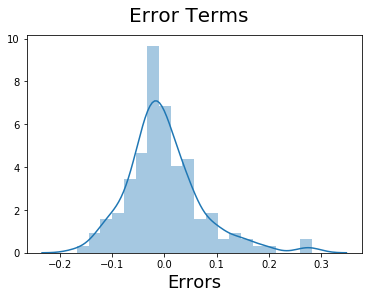

In [209]:
# let us plot the errors
y_train_price = linear_model_10.predict(X_train_linear_model_10)
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [210]:
# transform numerical variable in test data
num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

F:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
F:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [211]:
#prepare test data
y_test = df_test.pop('price')
X_test = df_test

In [212]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

F:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [213]:
y_pred = linear_model_10.predict(X_test_new)


Text(0, 0.5, 'y_pred')

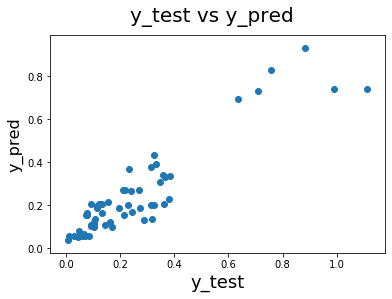

In [214]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [ ]:
#  The error terms are also normally distributed. Overall the model looks good. All variables have p-value and vif in limits.

# variables in the model will be:

# 1. compressionratio    
# 2. horsepower    
# 3. cylindernumber_four
# 4. LuxuryCars
# 5. carbody_convertible
# 6. enginetype_dohcv
# the final equation for prediction is:-

# price = ( 0.1747 x compressionratio) + (0.7518 x horsepower) + (-0.0516 x cylindernumber_four) + (0.2810 x LuxuryCars) + (-0.2239 x enginetype_dohcv) + (0.1029 x carbody_convertible) + 0.0196